## Data preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/My Drive/prueba/dataset.csv', sep=';', decimal=",")
# df = pd.read_csv('/content/drive/My Drive/dataset.csv', sep=';', na_values=[np.nan, '']) #Como aparecen los nan.

In [7]:
print(df.shape)
df.head()

(100000, 100)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [8]:
df['churn'] # target.
# df.drop(['Customer_ID'], axis=1, inplace=True)

,churn
0,1
1,0
2,1
3,0
4,0
...,...
99995,1
99996,0
99997,0
99998,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

<Axes: xlabel='count', ylabel='churn'>

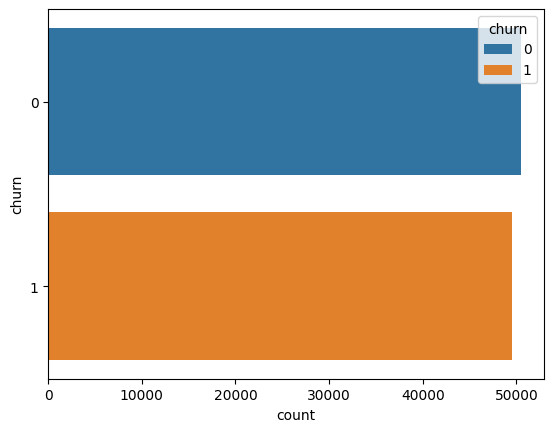

In [25]:
#Dataset balaced
sns.countplot(y=df['churn'], hue=df['churn'])

In [29]:
df['churn'].value_counts()

,count
churn,
0,50438
1,49562


In [34]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [33]:
for col in df.describe().columns:
    print(df.describe()[col])

count    99643.000000
mean        58.719985
std         46.291677
min         -6.167500
25%         33.260000
50%         48.195000
75%         70.750000
max       3843.262500
Name: rev_Mean, dtype: float64
count    99643.000000
mean       513.559937
std        525.168140
min          0.000000
25%        150.750000
50%        355.500000
75%        703.000000
max      12206.750000
Name: mou_Mean, dtype: float64
count    99643.000000
mean        46.179136
std         23.623489
min        -26.915000
25%         30.000000
50%         44.990000
75%         59.990000
max        409.990000
Name: totmrc_Mean, dtype: float64
count    99643.000000
mean         0.888828
std          2.177619
min          0.000000
25%          0.000000
50%          0.247500
75%          0.990000
max        159.390000
Name: da_Mean, dtype: float64
count    99643.000000
mean        41.072247
std         97.296150
min          0.000000
25%          0.000000
50%          2.750000
75%         42.000000
max       4320.7

In [35]:
df.dtypes

,0
rev_Mean,float64
mou_Mean,float64
totmrc_Mean,float64
da_Mean,float64
ovrmou_Mean,float64
...,...
kid11_15,object
kid16_17,object
creditcd,object
eqpdays,float64


In [47]:
df.dtypes == object

,0
rev_Mean,False
mou_Mean,False
totmrc_Mean,False
da_Mean,False
ovrmou_Mean,False
...,...
kid11_15,True
kid16_17,True
creditcd,True
eqpdays,False


In [62]:
num_variables = [var for var in df.columns if df[var].dtypes != object]
cat_variables = [var for var in df.columns if df[var].dtypes == object]

In [64]:
df[cat_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   new_cell          100000 non-null  object
 1   crclscod          100000 non-null  object
 2   asl_flag          100000 non-null  object
 3   prizm_social_one  92612 non-null   object
 4   area              99960 non-null   object
 5   dualband          99999 non-null   object
 6   refurb_new        99999 non-null   object
 7   hnd_webcap        89811 non-null   object
 8   ownrent           66294 non-null   object
 9   dwlltype          68091 non-null   object
 10  marital           98268 non-null   object
 11  infobase          77921 non-null   object
 12  HHstatin          62077 non-null   object
 13  dwllsize          61692 non-null   object
 14  ethnic            98268 non-null   object
 15  kid0_2            98268 non-null   object
 16  kid3_5            98268 non-null   obje

In [65]:
print(num_variables)

['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'p

## Preprocessing

Unique values

In [70]:
import numpy as np
for col in df:
    if df[col].nunique() < 5:
      print(col, df[col].nunique())

churn 2
new_cell 3
asl_flag 2
dualband 4
refurb_new 2
hnd_webcap 3
truck 2
rv 2
ownrent 2
dwlltype 2
infobase 2
numbcars 3
forgntvl 2
kid0_2 2
kid3_5 2
kid6_10 2
kid11_15 2
kid16_17 2
creditcd 2


There is not variables with unique values.
variables with unique values that are not categorical are: numbcars and forgntvl. Could be considered to be treated as categories.

In [68]:
one_percentage = []
for col in df:
    num = len(df[col].unique())
    percentage = num / df.shape[0] * 100
    # print('%s, %d, %.1f%%' % (col, num, percentage))
    if percentage < 1:
        one_percentage.append(col)
len(one_percentage)

58

In [ ]:
# summarize the number of unique values in each column
for col in df:
    num = len(df[col].unique())
    percentage = num / df.shape[0] * 100
    print('%s, %d, %.1f%%' % (col, num, percentage))

rev_Mean, 37469, 37.5%
mou_Mean, 9731, 9.7%
totmrc_Mean, 8492, 8.5%
da_Mean, 173, 0.2%
ovrmou_Mean, 2639, 2.6%
ovrrev_Mean, 12316, 12.3%
vceovr_Mean, 7517, 7.5%
datovr_Mean, 775, 0.8%
roam_Mean, 5338, 5.3%
change_mou, 7712, 7.7%
change_rev, 32538, 32.5%
drop_vce_Mean, 328, 0.3%
drop_dat_Mean, 60, 0.1%
blck_vce_Mean, 442, 0.4%
blck_dat_Mean, 54, 0.1%
unan_vce_Mean, 986, 1.0%
unan_dat_Mean, 52, 0.1%
plcd_vce_Mean, 2907, 2.9%
plcd_dat_Mean, 389, 0.4%
recv_vce_Mean, 1829, 1.8%
recv_sms_Mean, 94, 0.1%
comp_vce_Mean, 2316, 2.3%
comp_dat_Mean, 366, 0.4%
custcare_Mean, 209, 0.2%
ccrndmou_Mean, 458, 0.5%
cc_mou_Mean, 9231, 9.2%
inonemin_Mean, 1312, 1.3%
threeway_Mean, 91, 0.1%
mou_cvce_Mean, 68951, 69.0%
mou_cdat_Mean, 4420, 4.4%
mou_rvce_Mean, 51988, 52.0%
owylis_vce_Mean, 882, 0.9%
mouowylisv_Mean, 26847, 26.8%
iwylis_vce_Mean, 536, 0.5%
mouiwylisv_Mean, 21287, 21.3%
peak_vce_Mean, 2125, 2.1%
peak_dat_Mean, 236, 0.2%
mou_peav_Mean, 64094, 64.1%
mou_pead_Mean, 3168, 3.2%
opk_vce_Mean, 1928, 1.

Duplicates

In [71]:
print(df.shape)
#delete duplicate rows
df_drop_duplicates = df.drop_duplicates()
print(df_drop_duplicates.shape)

(100000, 100)
(100000, 100)


There is not duplicates rows.

Null values

In [72]:
for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on

* rev_Mean, Missing: 357 (0.4%)
* mou_Mean, Missing: 357 (0.4%)
* totmrc_Mean, Missing: 357 (0.4%)
* da_Mean, Missing: 357 (0.4%)
* ovrmou_Mean, Missing: 357 (0.4%)
* ovrrev_Mean, Missing: 357 (0.4%)
* vceovr_Mean, Missing: 357 (0.4%)
* datovr_Mean, Missing: 357 (0.4%)
* roam_Mean, Missing: 357 (0.4%)
* change_mou, Missing: 891 (0.9%)
* change_rev, Missing: 891 (0.9%)
* drop_vce_Mean, Missing: 0 (0.0%)
* drop_dat_Mean, Missing: 0 (0.0%)
* blck_vce_Mean, Missing: 0 (0.0%)
* blck_dat_Mean, Missing: 0 (0.0%)
* unan_vce_Mean, Missing: 0 (0.0%)
* unan_dat_Mean, Missing: 0 (0.0%)
* plcd_vce_Mean, Missing: 0 (0.0%)
* plcd_dat_Mean, Missing: 0 (0.0%)
* recv_vce_Mean, Missing: 0 (0.0%)
* recv_sms_Mean, Missing: 0 (0.0%)
* comp_vce_Mean, Missing: 0 (0.0%)
* comp_dat_Mean, Missing: 0 (0.0%)
* custcare_Mean, Missing: 0 (0.0%)
* ccrndmou_Mean, Missing: 0 (0.0%)
* cc_mou_Mean, Missing: 0 (0.0%)
* inonemin_Mean, Missing: 0 (0.0%)
* threeway_Mean, Missing: 0 (0.0%)
* mou_cvce_Mean, Missing: 0 (0.0%)
*

<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('* %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
<ipython-input-72-1e3ee60012a3>:4: FutureWarning: Calling int on

In [73]:
df.dropna()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.5000,0.2475,0.000000,0.000000,0.000000,0.000,0.0000,-157.250000,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
4,55.230000,570.500000,71.9800,0.0000,0.000000,0.000000,0.000000,0.000,0.0000,38.500000,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
9,31.662500,25.500000,29.9900,0.2475,0.000000,0.000000,0.000000,0.000,0.0000,59.500000,...,1.0,N,U,U,U,U,U,Y,601.0,1000010
14,212.515000,1971.500000,84.9900,2.2275,249.500000,99.800000,99.800000,0.000,35.4975,-200.500000,...,0.0,N,U,U,Y,U,U,Y,199.0,1000015
16,63.017500,440.250000,59.9800,0.0000,5.750000,1.725000,1.725000,0.000,1.3125,-16.250000,...,0.0,N,U,U,U,U,U,Y,530.0,1000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,49.362500,187.750000,40.0725,2.9700,18.000000,6.320000,6.125000,0.195,0.0000,-187.750000,...,0.0,S,U,U,U,U,U,Y,153.0,1099940
99940,47.490000,0.000000,49.9900,0.0000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,...,0.0,N,U,U,U,U,Y,Y,829.0,1099941
99963,41.840000,351.000000,30.0000,0.9900,31.000000,10.850000,10.850000,0.000,0.0000,0.000000,...,0.0,H,U,U,Y,U,U,Y,254.0,1099964
99970,38.340000,319.500000,30.0000,0.9900,21.000000,7.350000,7.350000,0.000,0.0000,-66.500000,...,0.0,H,U,U,U,U,U,Y,945.0,1099971


By deleting nan, valuable information could be deleted, such as a variable being assigned nan to a certain category.

In [74]:
print(df.isna().sum())

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer

# separate into input and output columns
X, y = df.drop(['churn', 'infobase'], axis=1), df['churn']
#inforbase: despues del dropna solo quedo con un valor.

# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=12)


In [ ]:
# import numpy as np
# for col in df:
#     print(col, df[col].nunique())

In [ ]:
# import numpy as np
# for col in df:
#     print(col, df[col].unique())
#     print(' ')

In [76]:
numeric_features = num_variables
categorical_features = cat_variables

In [ ]:

numeric_transformer = Pipeline(steps=[
                              ("imputer", SimpleImputer(strategy="most_frequent")),

                              ("scaler", StandardScaler())
                              # ("normal", Normalizer())
                              ])


categorical_transformer = Pipeline(steps=[
           ("imputer", SimpleImputer(strategy="most_frequent")),
           ("oneHotE", OneHotEncoder(handle_unknown="ignore"))
          #  ('ordinal', OrdinalEncoder())
           ])


transformer = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

In [ ]:
import matplotlib.pyplot as plt
for col in X[numeric_features]:
    plt.boxplot(df[col])
    fig = plt.figure(figsize =(10, 7))
    plt.show()

In [ ]:
%%time
model = DecisionTreeClassifier(random_state=10)
clf = Pipeline(steps=[
              ("transformer", transformer),
              ("classifier", model)]
)

clf.fit(X_train, y_train)
print("Model score: %.3f" % clf.score(X_eval, y_eval))

Model score: 0.550
CPU times: user 6.39 s, sys: 102 ms, total: 6.49 s
Wall time: 6.5 s


In [ ]:
%%time
model = RandomForestClassifier(random_state=10, )
clf = Pipeline(steps=[
              ("transformer", transformer),
              ("classifier", model)]
)

clf.fit(X_train, y_train)
print("Model score: %.3f" % clf.score(X_eval, y_eval))

Model score: 0.616
CPU times: user 28.2 s, sys: 91.7 ms, total: 28.3 s
Wall time: 29.6 s


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "n_estimators": 500
    }
model = GradientBoostingClassifier(random_state=10)
clf = Pipeline(steps=[
              ("transformer", transformer),
              ("classifier", model)]
)

clf.fit(X_train, y_train)
print("Model score: %.4f" % clf.score(X_eval, y_eval))



Model score: 0.6265
CPU times: user 1min 58s, sys: 216 ms, total: 1min 58s
Wall time: 2min 1s


In [ ]:
# from pickle import dump
# # save the model
# dump(model, open('model.pkl', 'wb'))

In [ ]:
# from pickle import load
# # load the model
# model = load(open('model.pkl', 'rb'))


In [ ]:


%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# for i in range(10,110):
model = GradientBoostingClassifier("n_estimators": 500, random_state=10)
clf = Pipeline(steps=[
              ("transformer", transformer),
              # ('feature', SelectFromModel(estimator=LogisticRegression())),
              ("classifier", model)]
)

clf.fit(X_train, y_train)
print("Model score: %.4f" % clf.score(X_eval, y_eval))


Model score: 0.6277
CPU times: user 35.3 s, sys: 54.8 ms, total: 35.3 s
Wall time: 40.6 s


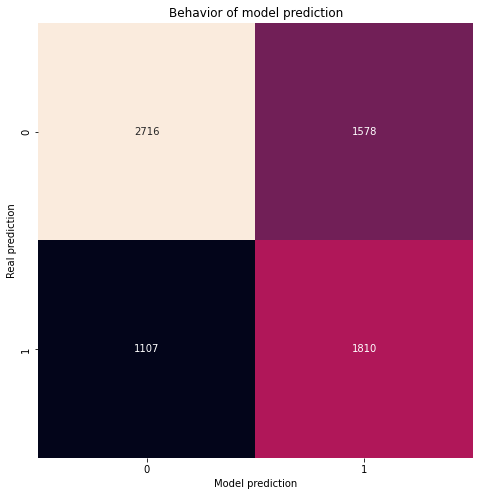

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def get_model_performance_test_set():
    y_pred = clf.predict(X_eval)



    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)

    mat = confusion_matrix(y_eval, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,
            # xticklabels=y.categories, yticklabels=y.categories)


    ax.set_xlabel('Model prediction')
    ax.set_ylabel('Real prediction')
    ax.set_title('Behavior of model prediction')
    fig.savefig('prediction_behavior.png')

get_model_performance_test_set()

In [ ]:
# %%time
# from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
# from numpy import mean, std

# model = GradientBoostingClassifier()
# clf = Pipeline(steps=[
#               ("transformer", transformer),
#               ("classifier", model)]
# )

# # define model evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
# # evaluate model
# scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
clf

In [ ]:
# from pickle import dump
# # save the model
# dump(model, open('model.pkl', 'wb'))

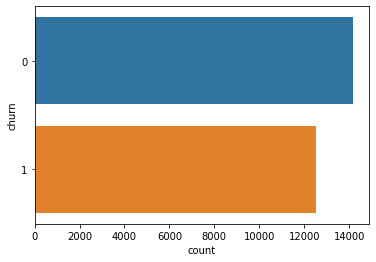

In [ ]:
#Dataset balaced
import seaborn as sns
sns.countplot(y=df['churn'])

### Selección de caracteristicas

In [ ]:
X_train_proc = OneHotEncoder().fit(X_train[categorical_features])
# X_train_proc = StandardScaler().fit(X_train[numeric_features])

In [ ]:
X_  = pd.get_dummies(X, columns = categorical_features, )

X_train_proc, X_eval_proc, y_train_proc, y_eval_proc = train_test_split(X_, y, test_size=0.3, random_state=12)

In [ ]:
params = {
    "n_estimators": 500}
clas = GradientBoostingClassifier(**params)
clas.fit(X_train_proc, y_train_proc)


GradientBoostingClassifier(n_estimators=500)

In [ ]:
print("Model score: %.4f" % clas.score(X_eval_proc, y_eval_proc))

Model score: 0.6346


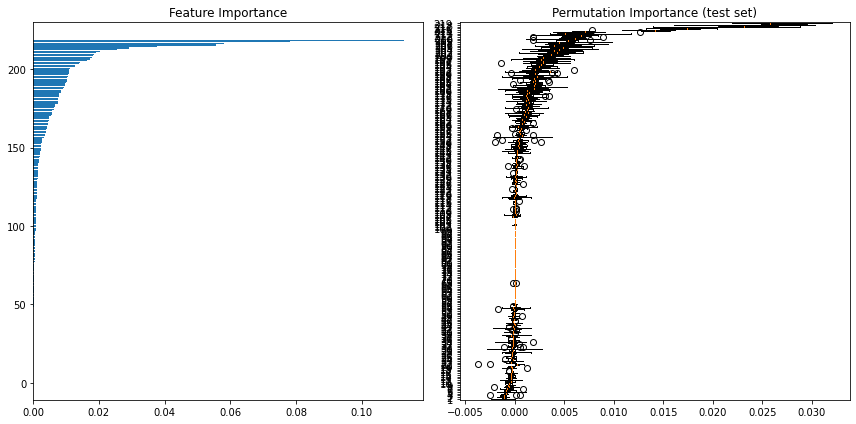

In [ ]:
from sklearn.inspection import permutation_importance

feature_importance = clas.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
# plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    clas, X_eval_proc, y_eval_proc, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    # labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
result.importances

array([[ 0.00277354,  0.00083206,  0.00263486, ...,  0.00263486,
         0.00263486,  0.00305089],
       [ 0.0205242 ,  0.03037027,  0.02302039, ...,  0.02038552,
         0.02510054,  0.02829011],
       [ 0.00332825,  0.00457634,  0.00443766, ...,  0.00069339,
         0.00651782,  0.0084593 ],
       ...,
       [-0.00097074, -0.00027735, -0.00124809, ...,  0.00069339,
         0.00013868, -0.00041603],
       [ 0.00013868,  0.00027735,  0.00027735, ...,  0.00013868,
         0.00013868,  0.00027735],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
feature_importance

array([1.28522981e-02, 5.57155072e-02, 3.76401075e-02, 5.86722590e-03,
       1.09805445e-02, 1.12438540e-02, 9.26963189e-03, 4.15171328e-03,
       1.03574018e-02, 5.81931220e-02, 2.04829895e-02, 1.02929530e-02,
       1.32353691e-03, 6.34473315e-03, 8.50953084e-04, 1.04404908e-02,
       1.04552935e-03, 5.41397382e-03, 1.01844574e-03, 7.72219670e-03,
       1.45726393e-03, 3.26167677e-03, 7.90008430e-04, 5.77013631e-03,
       2.24305795e-03, 9.69825704e-03, 7.64039775e-03, 2.66258839e-03,
       1.84639941e-02, 2.13077299e-03, 7.82223461e-03, 7.54733492e-03,
       1.79431094e-02, 4.59636789e-03, 1.06687668e-02, 1.09621237e-02,
       6.98402613e-04, 1.38338116e-02, 4.37295850e-03, 1.41406486e-02,
       2.66751938e-03, 1.81254426e-02, 1.18557272e-03, 9.79203453e-03,
       2.60708144e-03, 4.20844374e-03, 2.19279046e-04, 1.21673401e-03,
       1.12991973e-01, 6.31832751e-03, 4.89083226e-03, 1.26702962e-02,
       6.56989662e-03, 1.63334041e-02, 5.84188537e-03, 8.33956688e-03,
      

In [ ]:
result.importances_mean.argsort()

array([165, 160,  33, 203,  67,  62, 148, 135, 166,  75, 191, 216, 128,
       143, 133,  91, 157,  82,  70, 154,   6,  76, 196,  74, 174, 193,
        20, 215,  79,  30, 211,  40, 210, 149, 212, 130, 197,  27, 192,
       164, 179,  19, 204,  42,  18, 194, 126, 132, 129, 117, 178, 153,
       124,  29,  97,  73,  84,  83, 109,  88, 110, 113, 108, 107, 106,
       105, 104, 103,  86, 102, 100,  99, 114, 115, 118,  92,  90,  89,
       101, 116, 155, 176, 213, 205, 201, 190, 189, 188, 187, 186, 185,
       182, 180, 177,  80, 112, 173, 146, 147, 152, 175, 156, 111, 162,
       168, 158, 202, 140,  46, 169, 172, 134, 198, 218,  93, 214,  47,
        13, 209, 136,  96, 141,  81, 145, 159,  94,  12, 171,  16,  38,
       121, 207,  98,  36,  22,  78, 161, 167, 123, 184,  14, 127, 217,
       137, 142,   5,  24, 208, 144,  21, 131,  87,   4,  68, 181, 183,
       170,  77,   7, 125,  64, 195, 139, 138, 163, 206,  71,  85, 122,
        26,  44,  45, 119,  25, 120, 199,  15,  17, 150,   8,  5

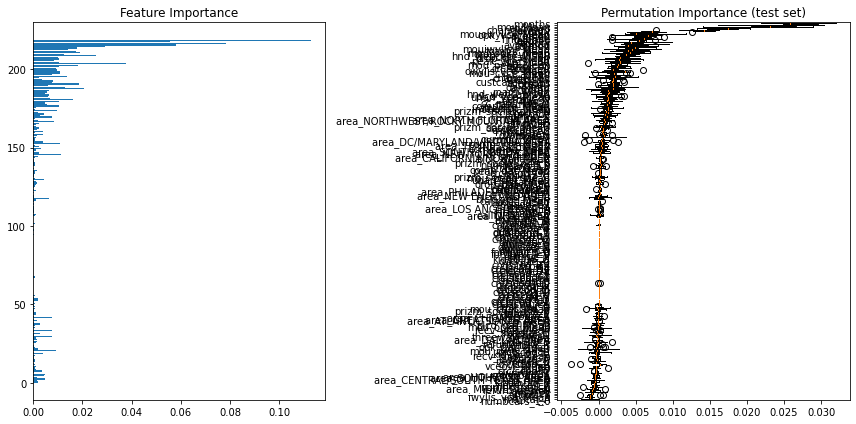

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
# plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance")

sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

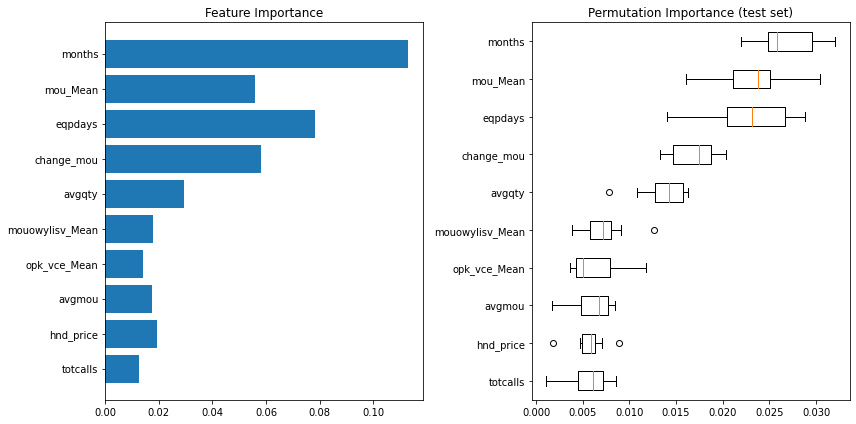

In [ ]:
sorted_idx = result.importances_mean.argsort()

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos[209:], feature_importance[sorted_idx[209:]], align="center")
plt.yticks(pos[209:], np.array(X_.columns)[sorted_idx[209:]])
plt.title("Feature Importance")


plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx[209:]].T,
    vert=False,
    labels=np.array(X_.columns)[sorted_idx[209:]],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
sorted_idx_ = np.argsort(feature_importance)
pos_ = np.arange(sorted_idx.shape[0])

Text(0.5, 1.0, 'Feature Importance')

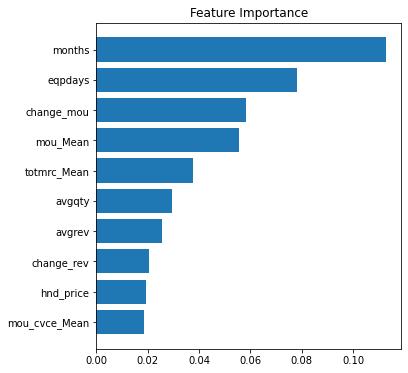

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos_[209:], feature_importance[sorted_idx_[209:]], align="center")
plt.yticks(pos_[209:], np.array(X_.columns)[sorted_idx_[209:]])
plt.title("Feature Importance")

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# for i in range(10,110):


clf.fit(X_train, y_train)
print("Model score: %.4f" % clf.score(X_eval, y_eval))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
    'gradientboostingclassifier__n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
    'gradientboostingclassifier__learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5, 8]
    "classifier": [GradientBoostingClassifier()]
    },
    {
        "preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier__n_estimators": [10, 100, 1000],
        "classifier": [RandomForestClassifier()]
    }
]

model = GradientBoostingClassifier(random_state=10)
cl = Pipeline(steps=[
              ("transformer", transformer),
              # ('feature', SelectFromModel(estimator=LogisticRegression())),
              ("classifier", model)]
)

In [ ]:
%%time
grid_search = GridSearchCV(cl, hyperparameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best params:")
print(grid_search.best_params_)

print(f"Internal CV score: {grid_search.best_score_:.3f}")

handle_unknoe -> Onehotencoder
Datos Gaussianos
Selección de caracterisicas.
